# eDreams test for Data Scientist Role

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*

# Index

1. [Imports](#1)   

2. [EDA & Data Cleaning](#2) <br>
    2.1 [Duplicate Check](#2.1)    
    2.2 [Null / NaN Handling](#2.2)    
    2.3 [Dates conversion](#2.3)       
    2.4 [Outliers Check](#2.4)
     
3. [Feature Engineering](#3)    
    3.1 [Season Features](#3.1)    
    3.2 [Country & Website](#3.2) <br>
    3.3 [Trip Duration](#3.3)<br>
    3.4 [Long Trip](#3.4)
    
4. [Label Encoding / One Hot Encoding](#4)

5. [Correlation Check](#5)

6. [Oversampling](#6)

7. [Modeling](#7)    
    7.1 [Setting K folds](#7.1)        
    7.2 [Parameter tunning](#7.2)       
    7.3 [Predicting](#7.3)  

8. [Submission](#8) 

<a id="1"></a>
### 1. Imports

In [74]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# For oversampling
from imblearn.over_sampling import SMOTE;
from imblearn.over_sampling import SMOTENC;

# Figures inline and set visualization style
%matplotlib inline
sns.set() #Different type of visualization

# Visualization
from plotly.offline import init_notebook_mode, iplot
from matplotlib import*
import plotly.figure_factory as ff
import cufflinks as cf
cf.getThemes();
cf.go_offline()
cf.set_config_file(world_readable=True, theme='polar')
import plotly.graph_objs as go
import plotly
from plotly import tools
from termcolor import colored

# Layout for plotly plots
layout1 = cf.Layout(
    height=400,
    width=900
)

# import the necessary modelling algorithms

# Classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Gradient Boosting
import xgboost
from xgboost import XGBClassifier

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Show multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

<a id="2"></a>
### 2. EDA & Data Cleaning

In [2]:
# We import the data
train_data = pd.read_csv('input/train.csv', sep = ';',  decimal=',') # we specify the decimal argument in 
test_data = pd.read_csv('input/test.csv', sep = ';',  decimal=',')   # order for floats to be read properly

# We take a look at the dataset to see that data was imported correctly
train_data.head()
test_data.head()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,628.844,TABLET,ROUND_TRIP,TRIP,True,False,0
1,1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,1281.430,SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,1730.350,TABLET,ROUND_TRIP,TRIP,True,False,0
3,3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,652.702,SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,1717.850,COMPUTER,ONE_WAY,TRIP,False,False,1


,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,3425.95,COMPUTER,ONE_WAY,TRIP,True,0
1,1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,3206.92,SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,6605.22,COMPUTER,ROUND_TRIP,TRIP,False,0
3,3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,1302.29,SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,6770.78,COMPUTER,ONE_WAY,TRIP,True,0


In [3]:
train_data.tail()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
49995,49995,02/July,EDUK,1,02/July,02/July,2,0,0,False,CONTINENTAL,1035.13,COMPUTER,ONE_WAY,TRIP,True,True,0
49996,49996,02/July,EDPT,1,11/August,19/August,2,1,0,False,CONTINENTAL,1152.20,SMARTPHONE,ROUND_TRIP,TRIP,True,False,0
49997,49997,02/July,GOFR,1,09/September,23/September,1,0,0,False,INTERCONTINENTAL,2236.54,SMARTPHONE,ROUND_TRIP,TRIP,False,False,0
49998,49998,02/July,EDPT,2,05/July,21/July,1,0,0,False,CONTINENTAL,1312.48,COMPUTER,ROUND_TRIP,TRIP,False,True,0
49999,49999,02/July,GOFR,0,06/July,06/July,1,0,0,False,INTERCONTINENTAL,2403.31,SMARTPHONE,ONE_WAY,TRIP,False,False,1


In [4]:
# Let's check the number of rows and columns of train and test
print('We have {} training rows and {} test rows.'.format(train_data.shape[0], test_data.shape[0]))
print('We have {} training columns and {} test columns.'.format(len(train_data.columns), len(test_data.columns))) 

We have 50000 training rows and 30000 test rows.
We have 18 training columns and 17 test columns.


In [5]:
# We take a first look at the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
ID               50000 non-null int64
TIMESTAMP        50000 non-null object
WEBSITE          50000 non-null object
GDS              50000 non-null int64
DEPARTURE        50000 non-null object
ARRIVAL          50000 non-null object
ADULTS           50000 non-null int64
CHILDREN         50000 non-null int64
INFANTS          50000 non-null int64
TRAIN            50000 non-null bool
HAUL_TYPE        50000 non-null object
DISTANCE         50000 non-null float64
DEVICE           49867 non-null object
TRIP_TYPE        50000 non-null object
PRODUCT          50000 non-null object
SMS              50000 non-null bool
EXTRA_BAGGAGE    50000 non-null bool
NO_GDS           50000 non-null int64
dtypes: bool(3), float64(1), int64(6), object(8)
memory usage: 5.9+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
ID           30000 non-null int64
TIMESTAMP    30000 non-null object
WEBSITE      30000 non-null object
GDS          30000 non-null int64
DEPARTURE    30000 non-null object
ARRIVAL      30000 non-null object
ADULTS       30000 non-null int64
CHILDREN     30000 non-null int64
INFANTS      30000 non-null int64
TRAIN        30000 non-null bool
HAUL_TYPE    30000 non-null object
DISTANCE     30000 non-null float64
DEVICE       29948 non-null object
TRIP_TYPE    30000 non-null object
PRODUCT      30000 non-null object
SMS          30000 non-null bool
NO_GDS       30000 non-null int64
dtypes: bool(2), float64(1), int64(6), object(8)
memory usage: 3.5+ MB


We can see we have some missing values in the `DEVICE` column in the train dataset. Later on we will decide what to do with them. <br>

Regarding the `ID` column. It tells us the same as the index from our dataframe, hence it's not giving us any extra information and because of all the entries are independent between each other we can safely drop it.

In [7]:
# We drop the ID column both in the train & test datset
df_train = train_data.drop('ID',axis=1)
df_test = test_data.drop('ID',axis=1)

In [8]:
df_train.head()
df_test.head()

,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,628.844,TABLET,ROUND_TRIP,TRIP,True,False,0
1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,1281.430,SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,1730.350,TABLET,ROUND_TRIP,TRIP,True,False,0
3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,652.702,SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,1717.850,COMPUTER,ONE_WAY,TRIP,False,False,1


,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,3425.95,COMPUTER,ONE_WAY,TRIP,True,0
1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,3206.92,SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,6605.22,COMPUTER,ROUND_TRIP,TRIP,False,0
3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,1302.29,SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,6770.78,COMPUTER,ONE_WAY,TRIP,True,0


<a id="2.1"></a>
###### 2.1. Duplicate Check

Let's check if there are any duplicates.

In [9]:
# We check if we have duplicates
df_train.duplicated().any()
df_test.duplicated().any()

True

True

It looks like we have duplicates on the dataset, but we have to be cautious here.

After droping the `ID` column, registers (rows) will loose their identity and the feature that made them unique. That doesn't mean they are duplicates. <br>
If we have 2 customers, being both of them adults, who bought their tickets from the same website, for the same trip and for the same dates (ignoring the rest of the features for one moment), they are likely to appear as duplicates, while they are 2 totally different people. <br>
The probability of having several registers with the same attributes its likely to happen in this kind of situations, as they seek general information, but regarding the passenger, the information which could make him/her unique is almost none. Hence, eventhough it looks like they are duplicates, it's better not to treat them as such.

<a id="2.2"></a>
###### 2.2. Null / NaN Handling

Let's treat the `null` values we saw we had in the `DEVICE` column. <br>
We will see how many `null` there are and we will take a decision about what to do with them.

In [10]:
# Values that the feature DEVICE can take
df_train['DEVICE'].unique()
df_test['DEVICE'].unique()

array(['TABLET', 'SMARTPHONE', 'COMPUTER', 'OTHER', nan], dtype=object)

array(['COMPUTER', 'SMARTPHONE', 'TABLET', 'OTHER', nan], dtype=object)

In [11]:
num_instances_train = 50000 # total number of instances in the train daataset
num_instances_test = 30000 # total number of instances in the test daataset

# For the train dataset
print('Number of NaN values in the train dataset = ' + str(num_instances_train - df_train['DEVICE'].value_counts().sum()))

# For the test dataset
print('Number of NaN values in the test dataset = ' + str(num_instances_test - df_test['DEVICE'].value_counts().sum()))

Number of NaN values in the train dataset = 133
Number of NaN values in the test dataset = 52


As we can observe that the amount of missing values it's ridiculously small. <br>
So here we have two different options: <br>

    1) Drop those null values
    2) Fill them with the most common value which is COMPUTER
    
As the amount is so small, we will enter them as `COMPUTER`, as it would not affect to much to our data.

In [12]:
# We drop those values in the train & test dataset
df_train = df_train.fillna('COMPUTER')
df_test= df_test.fillna('COMPUTER')

In [13]:
# Let's check that it has been done properly
df_train['DEVICE'].unique()
df_test['DEVICE'].unique()

array(['TABLET', 'SMARTPHONE', 'COMPUTER', 'OTHER'], dtype=object)

array(['COMPUTER', 'SMARTPHONE', 'TABLET', 'OTHER'], dtype=object)

As we can observe, we do not have NaN values anymore, great!

DEVICE
COMPUTER      34197
OTHER           942
SMARTPHONE    11709
TABLET         3152
Name: WEBSITE, dtype: int64

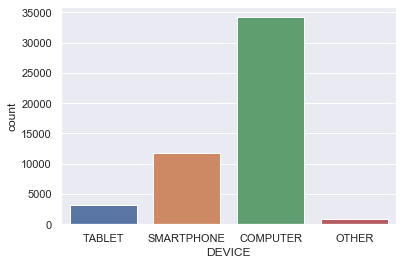

In [14]:
# Let's plot the amount of device types who enter the website
sns.countplot(x = 'DEVICE', data = df_train)
df_train.groupby(['DEVICE']).WEBSITE.count() # Device type who enter the website

We can observe how much more people access the website via the computer rather than the phone or tablet.

<a id="2.3"></a>
###### 2.3. Dates Conversion

As we saw before, our dates were `object` type. We will convert them into `datetime` type. <br>
Here we find a problem. <br>
Our dates have a day and a month respectively `01/July` for example, while the year is missing. This leads to a problem when trying to convert the dates as it will introduce a year by its own (year 1900). Hence, we have to come up with something to treat our dates and make them useful: <br>

- Are all dates in the same year?

    If they were not from the same year we could do some comparatives based on months of different years, or seasons,     for example, but as we do not know if they are from the same year we can't do this type of analysis.
    If they were from the same year we could just take into account months and days and do the analysis based only on     those two.
    
    
- Assuming they are all from the same year

    The easiest and the one which makes more sense here is to assume all of them are from the same year (1900    example, as it filled by default with `to_datetime` method from `pandas` library), just to fill the year in the format, so we are able to convert them to datetime format and then proceed with the analysis of this dates taking into account only the day and the month, forgetting about the year.

Before doing all this, there are some dates that do not have the same format as the rest. <br>
While most the dates have dd/M format (04/July), there are some that have dd-m format (17-may). This leads to problems when converting the dates. 

Let's replace the `-` symbols with `/` so all the dates have the same format.

In [15]:
def replace_function(train, columns):
    for column in columns:
        try:
            if train: # for the train dataset
                df_train[column] = df_train[column].str.replace('-', '/'); # replacing simbols
                df_train[column] = pd.to_datetime(df_train[column], format='%d/%B'); # conversion to datetime format
            else:  # for the test dataset
                df_test[column] = df_test[column].str.replace('-', '/'); # replacing simbols
                df_test[column] = pd.to_datetime(df_test[column], format='%d/%B'); # conversion to datetime format
        except:
            print(columns)

In [16]:
dates_train = df_train[['TIMESTAMP', 'DEPARTURE', 'ARRIVAL']]
dates_test = df_test[['TIMESTAMP', 'DEPARTURE', 'ARRIVAL']]

replace_function(True, dates_train);
replace_function(False, dates_test);

In [17]:
# We take a look to see that it has been done properly
x = df_train['DEPARTURE'][2]
y = df_test['ARRIVAL'][13]
x
y

Timestamp('1900-07-29 00:00:00')

Timestamp('1900-10-22 00:00:00')

In [18]:
df_train.dtypes

TIMESTAMP        datetime64[ns]
WEBSITE                  object
GDS                       int64
DEPARTURE        datetime64[ns]
ARRIVAL          datetime64[ns]
ADULTS                    int64
CHILDREN                  int64
INFANTS                   int64
TRAIN                      bool
HAUL_TYPE                object
DISTANCE                float64
DEVICE                   object
TRIP_TYPE                object
PRODUCT                  object
SMS                        bool
EXTRA_BAGGAGE              bool
NO_GDS                    int64
dtype: object

Our dates are now as `datetime` type, so we can now proceed with the analysis and use them.

<a id="2.4"></a>
#### 2.4. Outliers Check

In [19]:
df_train.describe()

,GDS,ADULTS,CHILDREN,INFANTS,DISTANCE,NO_GDS
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.642420,1.488240,0.09910,0.018160,2200.182573,0.591340
std,0.581828,0.828755,0.38931,0.135759,2558.688601,0.642328
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,0.000000,788.826000,0.000000
50%,1.000000,1.000000,0.00000,0.000000,1317.955000,1.000000
75%,1.000000,2.000000,0.00000,0.000000,2110.260000,1.000000
max,4.000000,9.000000,5.00000,2.000000,19766.100000,4.000000


In [20]:
df_train.columns

Index(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS'],
      dtype='object')

There are some columns where there is no need to check for outliers, such as all the dates columns, or the ones who consists on boolean values. <br>
Also some columns like `DISTANCE` will be studied separately as the distribution of that data will make the plot harder to interpret (as data is not normalized/standarized and values dismatch from the rest of the columns).

Let's take a look at the `DISTANCE` column:

In [21]:
# Let's get some information about how the data is distributed (mean, min, max, etc.)
df_train['DISTANCE'].describe()

count    50000.000000
mean      2200.182573
std       2558.688601
min          0.000000
25%        788.826000
50%       1317.955000
75%       2110.260000
max      19766.100000
Name: DISTANCE, dtype: float64

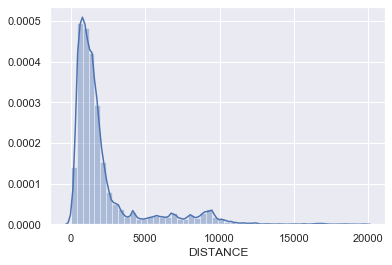

In [22]:
sns.distplot(df_train['DISTANCE']);

We can see that the number of long distance trips is minimal, compared to the "short" ones. Here we have to take into account that the mean distance of the trips is 2199.90. <br>
*Can we consider some of those long distance trips as outliers and drop them...?* <br>
We will keep them, as they can be normal situations where the distance of the trip it's just bigger than the distance in trips people usually do, as they require less time and they are normally cheaper. 

Let's check if we are facing a balanced dataset:

False    40201
True      9799
Name: EXTRA_BAGGAGE, dtype: int64


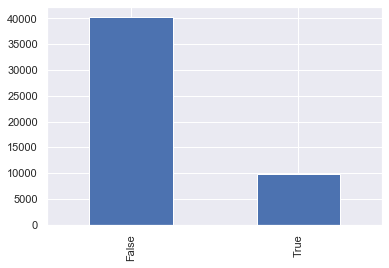

In [23]:
print(df_train['EXTRA_BAGGAGE'].value_counts())
df_train['EXTRA_BAGGAGE'].value_counts().plot(kind='bar');

We are facing a desbalanced dataset. <br>
By now we will not take this into account as we will handle this situation further on before modeling, but let's keep it in mind.

<a id="3"></a>
### 3. Feature Engineering

<a id="3.1"></a>
##### 3.1. Seaon Ticket

By getting the day, the month and the season out of the date when the booking was bought we will be able to feed our model with an important feature as XGBoost (the model we will be using), based in trees, does not work with dates. <br>
With this feature we will provide him with information regarding the dates.

In [24]:
# Extract information from the booking dates column and will create a column with the info as an int

# For the month
df_train['MONTH'] = pd.DatetimeIndex(df_train['TIMESTAMP']).month
df_test['MONTH'] = pd.DatetimeIndex(df_test['TIMESTAMP']).month

# For the day
df_train['DAY'] = pd.DatetimeIndex(df_train['TIMESTAMP']).day
df_test['DAY'] = pd.DatetimeIndex(df_test['TIMESTAMP']).day

In [25]:
# This function will map each month (int) to a season (int from 1-4)
def get_estacion(mes):
    if mes in [12,1,2]: # from December until March [12-03)
        return 1
    if mes in [3,4,5]: # from March untill June [03-06)
        return 2
    if mes in [6,7,8]: # from June until September [06-09)
        return 3
    if mes in [9,10,11]: # from September untill November [09-11]
        return 4

In [26]:
# We apply the conversion from month to date in train & test datasets
df_train['SEASON'] = df_train['MONTH'].apply(lambda x: get_estacion(x))
df_test['SEASON'] = df_test['MONTH'].apply(lambda x: get_estacion(x))

<a id="3.2"></a>
##### 3.2. Country & Website

We will split the `WEBSITE` column (string) into 2 different columns:<br>

    1) Will be the WEBSITE, without the country code (`ED, OP, ...`)
    2) Will be the COUNTRY code (`ES, IT, UK, ...`)

In [27]:
df_train['WEB'] = train_data['WEBSITE'].apply(lambda x: x[:-2])
df_test['WEB'] = test_data['WEBSITE'].apply(lambda x: x[:-2])

In [28]:
df_train['COUNTRY'] = train_data['WEBSITE'].apply(lambda x: x[-2:])
df_test['COUNTRY'] = test_data['WEBSITE'].apply(lambda x: x[-2:])

<a id="3.3"></a>
##### 3.3. Trip Duration

We will study both the departure and arrival columns to create a new column with the amount of days that the trip had. <br>
This will be a way of getting the `DEPARTURE` and `ARRIVAL` dates into use for our XGB model. 

In [29]:
# We get the duration of the trips in days
df_train['TRIP_DURATION'] = pd.DatetimeIndex(df_train['ARRIVAL']) - pd.DatetimeIndex(df_train['DEPARTURE'])
df_test['TRIP_DURATION'] = pd.DatetimeIndex(df_test['ARRIVAL']) - pd.DatetimeIndex(df_test['DEPARTURE'])

In [30]:
# We extract the days from and we convert them into int's
df_train['TRIP_DURATION'] = df_train['TRIP_DURATION'].apply(lambda x: int((str(x)[:2]).strip()))
df_test['TRIP_DURATION'] = df_test['TRIP_DURATION'].apply(lambda x: int((str(x)[:2]).strip()))

<a id="3.4"></a>
##### 3.4. Long Trip

We will study the feature created above in order to know if the trip duration was long or not. <br>
We have to take into account here what we will consider a "long trip" and what no. <br>

- We will consider a trip had a long duration, hence it's a long trip, if it had more than 15 days (from `DEPARTURE` to `ARRIVAL`, this being 15 or more in the `TRIP_DURATION` column).

In [31]:
# This function will map each month (int) to a season (int from 1-4)
def was_long_trip(trip_duration):
    if trip_duration >= 15: # If the trip took more than 15 days
        return 1 # True (already one hot encoded)
    else: # If it took less than 15 days
        return 0

In [32]:
# We apply the conversion from month to date in train & test datasets
df_train['LONG_TRIP'] = df_train['TRIP_DURATION'].apply(lambda x: was_long_trip(x))
df_test['LONG_TRIP'] = df_test['TRIP_DURATION'].apply(lambda x: was_long_trip(x))

<a id="4"></a>
### 4. Label Encoding / One Hot Encoding

Most of the features in our dataset are categorical, for example: `WEBSITE` has values like `EDES, GOFT, EDUK, ...` and `DEVICE` has values such as `COMPUTER, SMARTPHONE, ...` for instance. <br>
We need to label this data in order to assign a number to each category, this is converting our categorical data into numerical data so our model can handle it.

In [33]:
def encoding_columns(train, bool_enc, columns):
    for column in columns:
        try:
            lbl = LabelEncoder();
            if train: # for the train dataset
                if bool_enc: # for the boolean columns
                    df_train[column] = df_train[column].astype(int)
                else:
                    lbl.fit(list(df_train[column].values));
                    df_train[column] = lbl.transform(list(df_train[column].values));
            else:  # for the test dataset
                if bool_enc: # for the boolean columns
                    df_test[column] = df_test[column].astype(int)
                else:
                    lbl.fit(list(df_test[column].values));
                    df_test[column] = lbl.transform(list(df_test[column].values));
        except:
            print(columns)

In [34]:
train_categoricals = df_train.select_dtypes(include='object').columns
test_categoricals = df_test.select_dtypes(include='object').columns

encoding_columns(True, False, train_categoricals);
encoding_columns(False, False, test_categoricals);

In the same way that we have done the encoding for the `object` type data above, we have to encode the `boolean` data too, giving them values of {0 or 1} respectively.

In [35]:
train_bool = df_train.select_dtypes(include='bool').columns
test_bool = df_test.select_dtypes(include='bool').columns

encoding_columns(True, True, train_bool);
encoding_columns(False, True, test_bool);

In [36]:
# We check that it has been done properly
df_train.dtypes
df_test.dtypes

TIMESTAMP        datetime64[ns]
WEBSITE                   int64
GDS                       int64
DEPARTURE        datetime64[ns]
ARRIVAL          datetime64[ns]
ADULTS                    int64
CHILDREN                  int64
INFANTS                   int64
TRAIN                     int64
HAUL_TYPE                 int64
DISTANCE                float64
DEVICE                    int64
TRIP_TYPE                 int64
PRODUCT                   int64
SMS                       int64
EXTRA_BAGGAGE             int64
NO_GDS                    int64
MONTH                     int64
DAY                       int64
SEASON                    int64
WEB                       int64
COUNTRY                   int64
TRIP_DURATION             int64
LONG_TRIP                 int64
dtype: object

TIMESTAMP        datetime64[ns]
WEBSITE                   int64
GDS                       int64
DEPARTURE        datetime64[ns]
ARRIVAL          datetime64[ns]
ADULTS                    int64
CHILDREN                  int64
INFANTS                   int64
TRAIN                     int64
HAUL_TYPE                 int64
DISTANCE                float64
DEVICE                    int64
TRIP_TYPE                 int64
PRODUCT                   int64
SMS                       int64
NO_GDS                    int64
MONTH                     int64
DAY                       int64
SEASON                    int64
WEB                       int64
COUNTRY                   int64
TRIP_DURATION             int64
LONG_TRIP                 int64
dtype: object

<a id="5"></a>
### 5. Correlation Check

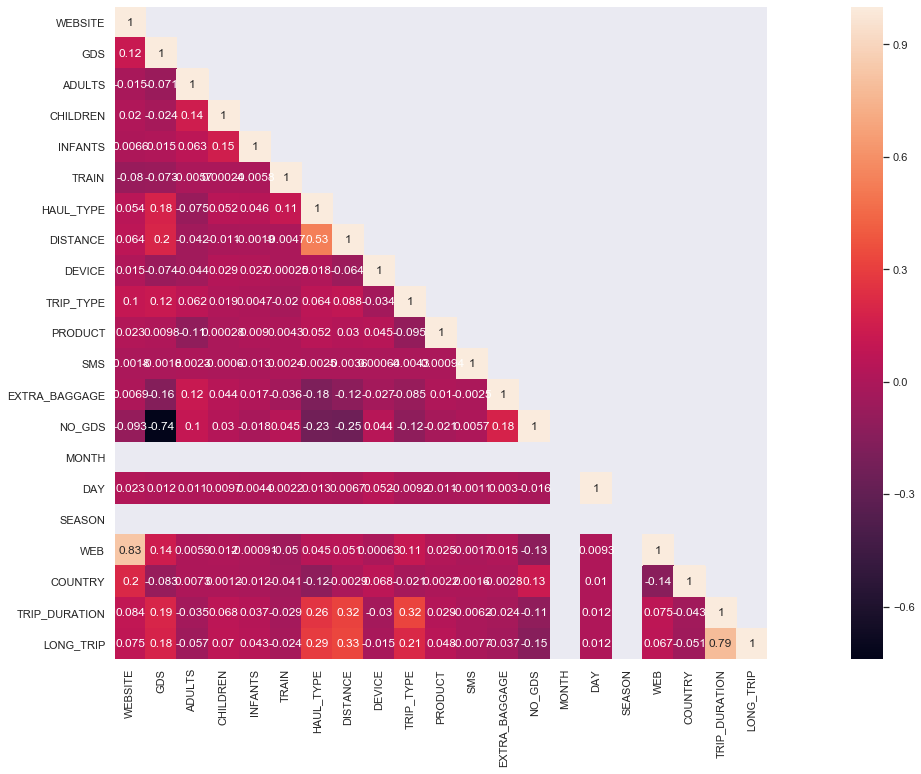

In [37]:
# Correlation Matrix
cor_mat= df_train.corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

fig=plt.gcf()
fig.set_size_inches(30,12)

sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

We have some correlated features. Let's drop them so the don't introduce noise in our model.

In [38]:
# We drop the correlated features

# SEASON
df_train = df_train.drop(['SEASON'], axis=1)
df_test = df_test.drop(['SEASON'], axis=1)

# MONTH
df_train = df_train.drop(['MONTH'], axis=1)
df_test = df_test.drop(['MONTH'], axis=1)

# WEBSITE
df_train = df_train.drop(['WEBSITE'], axis=1)
df_test = df_test.drop(['WEBSITE'], axis=1)

<a id="6"></a>
### 6. Oversampling

As we saw before, we are facing a desbalanced dataset, hence we will use oversampling in order to balance the classes. <br>

*The technique that we are going tu use it's called SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) (https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html).*

What this technique does is create instances and registers of the class with fewer instance in an "intelligent" way. But taking into account categorical features, unlike SMOTE that will create values such as 0.65 for example when varibles take values of 0 or 1. 

###### *Why is it important to balance the classes?*

As we are facing a clasification problem. If we do not balance the dataset and the classes to predict, our model will likely classify always towards the class with more existing registers, as it will be less likely to be mistaken. <br>

*If we have 100 situations from class A and 1 situation from class B, and new situations come up for our model to predict from which class is that situation, our model will likely predict is from class A, as from what the model has seen it is less probable to make a mistake.*

In [39]:
df_train.columns

Index(['TIMESTAMP', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS', 'CHILDREN',
       'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE', 'TRIP_TYPE',
       'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS', 'DAY', 'WEB', 'COUNTRY',
       'TRIP_DURATION', 'LONG_TRIP'],
      dtype='object')

In [40]:
x_train = df_train.drop('EXTRA_BAGGAGE', axis=1)
y_train = df_train.drop(['TIMESTAMP', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
                         'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
                         'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS', 'DAY', 'WEB', 'COUNTRY', 
                         'TRIP_DURATION', 'LONG_TRIP'], axis=1)

In [41]:
# We drop the dates as SMOTENC does not behave well with them
x_train = x_train.drop(['DEPARTURE', 'ARRIVAL', 'TIMESTAMP'], axis=1)

In [42]:
x_train.columns

Index(['GDS', 'ADULTS', 'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE',
       'DISTANCE', 'DEVICE', 'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS', 'DAY',
       'WEB', 'COUNTRY', 'TRIP_DURATION', 'LONG_TRIP'],
      dtype='object')

In [43]:
# We initialize SMOTENC
sm = SMOTENC(categorical_features=[4,5,7,8,9,10,12,13,14,15,16]) # We indicate the position of the categorical features/columns

# We apply oversampling in our train dataset
x_train, y_train = sm.fit_resample(x_train, y_train)

In [44]:
# Let's check the amount of records in each class
y_train['EXTRA_BAGGAGE'].value_counts()

1    40201
0    40201
Name: EXTRA_BAGGAGE, dtype: int64

Now we can see our dataset is balanced, so we can proceed with the modeling.

<a id="7"></a>
### 7. Modeling

In [45]:
# We get a list of the names of the target features
target_names = ['True', 'False']

In [46]:
# We define de label
y_label = y_train

The last thing to do before modeling needs to be dropping the columns that take datetime as a type input as XGBoost its not good with non numerical features. 

In [47]:
x_test = df_test.drop(['TIMESTAMP', 'DEPARTURE', 'ARRIVAL'], axis=1)

Let's check both the train & test shapes are ok:

In [48]:
x_train.shape
x_test.shape

(80402, 17)

(30000, 17)

In [49]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_label, test_size = 0.25, random_state = 0)

<a id="7.1"></a>
##### 7.1. Setting K folds

In [50]:
# Setting a 5-fold stratified cross-validation (note: shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

<a id="7.2"></a>
##### 7.2. Parameter tunning

In [51]:
# Parameters for the model
params_model1 = {
    'booster': ['dart', 'gbtree', 'gblinear'],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [10, 15, 20],
    'gamma': [1.5, 2, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4, 5, 6, 7, 8],
    'max_delta_step': [0, 1, 2, 3, 5],
    'base_score': [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65],
    'reg_alpha': [1, 1.5, 2],
    'reg_lambda': [1, 1.5, 2, 2.5, 3],
    'n_estimators': [100, 200, 500, 1000]
}

In [52]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.8, gamma=1,
                    learning_rate=0.1, max_delta_step=0, max_depth=10,
                    min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=0.8, verbosity=1)

scoring = 'f1'

rs_xgb = RandomizedSearchCV(xgb, param_distributions=params_model1, n_iter=7,
                            scoring=scoring,  n_jobs=4, cv=skf.split(x_train, y_train), verbose=3,
                            random_state=1001)

# We train the model
rs_xgb.fit(x_train, y_train)

# We train the model with the best estimator
refit = rs_xgb.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 19.4min
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed: 26.8min finished
/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x12fed6750>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=1,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=10, min_child_weight=5,
                                           missing=na...
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [1.5, 2, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                           

In [53]:
rs_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 1000,
 'min_child_weight': 15,
 'max_depth': 6,
 'max_delta_step': 1,
 'learning_rate': 0.1,
 'gamma': 1.5,
 'colsample_bytree': 0.8,
 'booster': 'gbtree',
 'base_score': 0.65}

In [54]:
x_train.columns

Index(['GDS', 'ADULTS', 'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE',
       'DISTANCE', 'DEVICE', 'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS', 'DAY',
       'WEB', 'COUNTRY', 'TRIP_DURATION', 'LONG_TRIP'],
      dtype='object')

In [55]:
refit.feature_importances_

array([0.17167789, 0.02083233, 0.01316715, 0.01278654, 0.17463034,
       0.10679705, 0.0218558 , 0.06661189, 0.06013719, 0.04101579,
       0.01563575, 0.08047666, 0.046535  , 0.02677113, 0.02469403,
       0.04734077, 0.06903464], dtype=float32)

<BarContainer object of 17 artists>

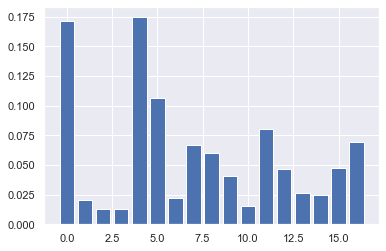

In [56]:
pyplot.bar(range(len(refit.feature_importances_)), refit.feature_importances_)
pyplot.show()

<a id="7.3"></a>
##### 7.3. Predicting

In [57]:
# Predictions on the train set
y_train_predict = refit.predict(x_train)

In [58]:
# We create the confusion matrix
train_cm = confusion_matrix(y_train, y_train_predict)

print(colored('The Confusion Matrix in the train set is: ', 'red'),'\n', train_cm)
print(colored('The score on the train set is: ', 'blue'), colored(str(f1_score(y_train, y_train_predict)), 'blue'))

The Confusion Matrix in the train set is:  
 [[25274  4951]
 [ 3995 26081]]
The score on the train set is:  0.8536034561759508


In [59]:
print(classification_report(y_train, y_train_predict, target_names=target_names))

              precision    recall  f1-score   support

        True       0.86      0.84      0.85     30225
       False       0.84      0.87      0.85     30076

    accuracy                           0.85     60301
   macro avg       0.85      0.85      0.85     60301
weighted avg       0.85      0.85      0.85     60301



It doesn't look as our model was doing overfitting, let's check the confusion matrix for the validation set:

In [60]:
# We make the predictions
y_predict = refit.predict(x_val)

In [61]:
# We create the confusion matrix
cm = confusion_matrix(y_val, y_predict)

print(colored('The Confusion Matrix in the validation set is: ', 'red'),'\n', cm)
print(colored('The score on the test set is: ', 'blue'), colored(str(f1_score(y_val, y_predict)), 'blue'))

The Confusion Matrix in the validation set is:  
 [[7990 1986]
 [1702 8423]]
The score on the test set is:  0.8203954417064382


In [62]:
print(classification_report(y_val, y_predict, target_names=target_names))

              precision    recall  f1-score   support

        True       0.82      0.80      0.81      9976
       False       0.81      0.83      0.82     10125

    accuracy                           0.82     20101
   macro avg       0.82      0.82      0.82     20101
weighted avg       0.82      0.82      0.82     20101



As we are facing a classification it's important to check FP and FN values, apart from the f1 score. <br>
Being a classification problem and being the dataset not balanced, if we do not check FP & FN values, our model could go straight and assume that the value to predict is from the dominant class and we could have a high score, but a lot of FP and FN, being then the model almost useless. <br>
In this type of situations it's really important to check the confusion matrix in order to see how are FP & FN behaving.

<a id="8"></a>
### 8. Submission

In [63]:
# We read the test csv for the ID column
df_sub = pd.read_csv('input/test.csv', sep = ';',  decimal=',')

In [64]:
# Predictions on the test set
submission_pred = refit.predict(x_test)

In [65]:
# We convert the 0'a and 1's back to boolean values
y_predict_bool = list(map(bool,submission_pred))

In [66]:
df_sub = df_sub['ID'].to_frame()

In [67]:
df_sub.columns

Index(['ID'], dtype='object')

In [68]:
x_test['ID'] = df_sub['ID'].astype(object)

In [69]:
#x_test['EXTRA_BAGGAGE'] = y_predict_bool
x_test['EXTRA_BAGGAGE'] = y_predict_bool

# We create the submission dataframe
sub_check = x_test[['ID', 'EXTRA_BAGGAGE']]

In [70]:
# We check the shape is correct
sub_check.shape

(30000, 2)

In [71]:
# We generate the csv with the predictions for the submission
sub_check.to_csv('output/tomasruan_ds_test.csv', index=False, header=True)

In [73]:
sub_check.head()
sub_check.tail()

,ID,EXTRA_BAGGAGE
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


,ID,EXTRA_BAGGAGE
29995,29995,True
29996,29996,False
29997,29997,False
29998,29998,False
29999,29999,True


## Greetings

I wanted to finish this test by giving thanks for the opportunity to work in such an amazing company that I have been looking up for many years now.<br>
It would be like a dream to be part of such an amazing project, as it would be great to contribute to such an amazing mission that so much joy has brought me through the years. <br>
I hope I made a good impression and you take me into consideration for this position. 

I look forward to hearing from you.

Kind regards,

Tomas Ruan

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*